In [50]:
import kagglehub
import matplotlib.pyplot as plt
# Download the latest version.
path = kagglehub.dataset_download('dansbecker/urban-and-rural-photos')

Using Colab cache for faster access to the 'urban-and-rural-photos' dataset.


'/kaggle/input/urban-and-rural-photos'

The dataset has been downloaded to: `/kaggle/input/urban-and-rural-photos`.

In [6]:
import os

# List the contents of the downloaded dataset directory
print(os.listdir(path))

['rural_and_urban_photos', 'val', 'train']


In [71]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import Sequential
from keras.layers import Dense, Flatten, Input, Dropout

import numpy as np

In [12]:
base_model = ResNet50(include_top = False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [72]:
inp_shape = (224, 224, 3)
model = Sequential()
model.add(Input(shape = inp_shape))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))




In [73]:
model.layers[0].trainable = False

In [74]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │       200,706 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [77]:
train_dir = '/kaggle/input/urban-and-rural-photos/rural_and_urban_photos/train'
val_dir = '/kaggle/input/urban-and-rural-photos/rural_and_urban_photos/val'

In [78]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [79]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode = 'categorical')

Found 72 images belonging to 2 classes.


In [80]:
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode = 'categorical')

Found 20 images belonging to 2 classes.


In [81]:
augumted_images, labels = next(train_generator)

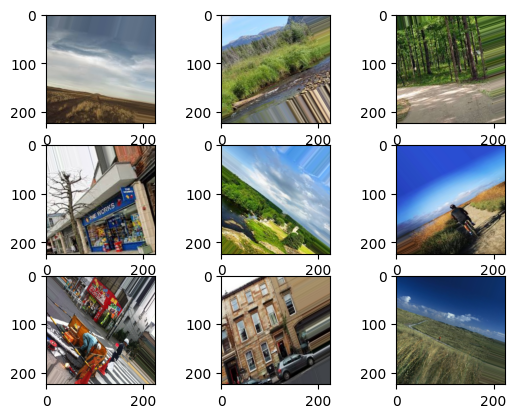

In [82]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(augumted_images[i]/255)

In [83]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose =2)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 - 30s - 10s/step - accuracy: 0.5139 - loss: 10.1068 - val_accuracy: 0.9500 - val_loss: 0.2131
Epoch 2/10
3/3 - 19s - 6s/step - accuracy: 0.6667 - loss: 8.8301 - val_accuracy: 0.5500 - val_loss: 7.5090
Epoch 3/10
3/3 - 17s - 6s/step - accuracy: 0.9167 - loss: 2.9635 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 - 19s - 6s/step - accuracy: 0.9583 - loss: 1.2424 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/10
3/3 - 22s - 7s/step - accuracy: 0.9028 - loss: 2.3018 - val_accuracy: 0.9500 - val_loss: 0.2042
Epoch 6/10
3/3 - 37s - 12s/step - accuracy: 0.9444 - loss: 0.5172 - val_accuracy: 1.0000 - val_loss: 9.9232e-06
Epoch 7/10
3/3 - 18s - 6s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 - 18s - 6s/step - accuracy: 0.9861 - loss: 0.0312 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/10
3/3 - 17s - 6s/step - accuracy: 0.9583 - loss: 0.2716 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 10/10
3/

In [84]:
history.history

{'accuracy': [0.5138888955116272,
  0.6666666865348816,
  0.9166666865348816,
  0.9583333134651184,
  0.9027777910232544,
  0.9444444179534912,
  1.0,
  0.9861111044883728,
  0.9583333134651184,
  0.9722222089767456],
 'loss': [10.106761932373047,
  8.830081939697266,
  2.9634644985198975,
  1.2424352169036865,
  2.3018319606781006,
  0.5172088146209717,
  0.0010594247141852975,
  0.031169384717941284,
  0.2716417908668518,
  0.22931453585624695],
 'val_accuracy': [0.949999988079071,
  0.550000011920929,
  1.0,
  1.0,
  0.949999988079071,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.21312887966632843,
  7.508984565734863,
  0.0,
  0.0016451990231871605,
  0.20421461760997772,
  9.923188372340519e-06,
  0.0,
  0.0,
  0.0,
  0.0]}

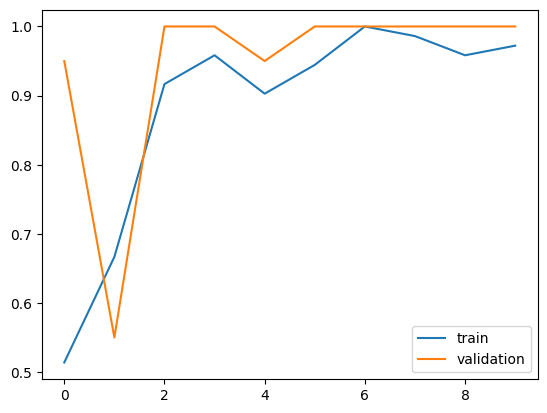

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.show()

In [86]:
actual = val_generator.classes

In [87]:
y_pred = model.predict(val_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [88]:
pred = np.argmax(y_pred, axis = 1)

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(actual, pred)

array([[4, 6],
       [6, 4]])